In [169]:
# downloading and unzipping dataset
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2024-08-05 11:55:19--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K  2.66MB/s    in 0.4s    

2024-08-05 11:55:19 (2.66 MB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/links.csv  
replace ml-latest-small/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [170]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [171]:
# data exploration and pre-processing

movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

movies_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [172]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [173]:
total_ratings = len(ratings_df)
total_movies = len(ratings_df['movieId'].unique())
total_users = len(ratings_df['userId'].unique())

print(f"Total number of ratings: {total_ratings}")
print(f"Total number of movies: {total_movies}")
print(f"Total number of users: {total_users}")


print(f"Average ratings per user: {round(total_ratings/total_users, 2)}")
print(f"Average ratings per movie: {round(total_ratings/total_movies, 2)}")


Total number of ratings: 100836
Total number of movies: 9724
Total number of users: 610
Average ratings per user: 165.3
Average ratings per movie: 10.37


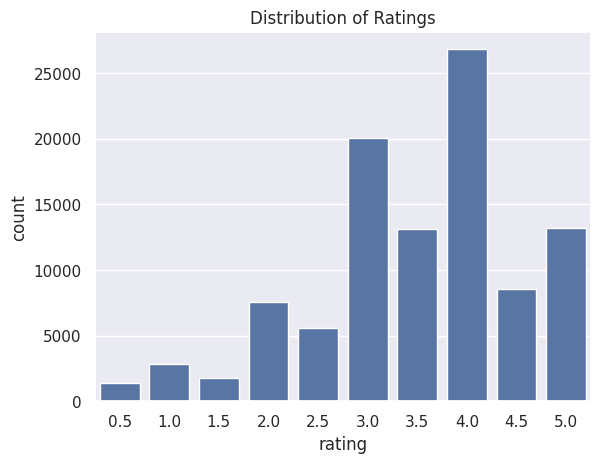

In [174]:
sns.set_theme(style="darkgrid")
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Ratings')
plt.show()

In [175]:
print(f"mean rating: {round(ratings_df['rating'].mean(), 2)}")
print(f"median rating: {round(ratings_df['rating'].median(), 2)}")
print(f"min rating: {round(ratings_df['rating'].min(), 2)}")
print(f"max rating: {round(ratings_df['rating'].max(), 2)}")
print(f"mean rating per user: {round(ratings_df.groupby('userId')['rating'].mean().mean(), 2)}")
print(f"mean rating per movie: {round(ratings_df.groupby('movieId')['rating'].mean().mean(), 2)}")

mean rating: 3.5
median rating: 3.5
min rating: 0.5
max rating: 5.0
mean rating per user: 3.66
mean rating per movie: 3.26


In [176]:
ratings_df['movieId'].value_counts(ascending=False).head(5)


,count
movieId,
356,329
318,317
296,307
593,279
2571,278


In [177]:
print(f"movie with most ratings {movies_df.loc[movies_df['movieId'] == 356, 'title'].iloc[0]}")

movie with most ratings Forrest Gump (1994)


<Axes: xlabel='rating', ylabel='count'>

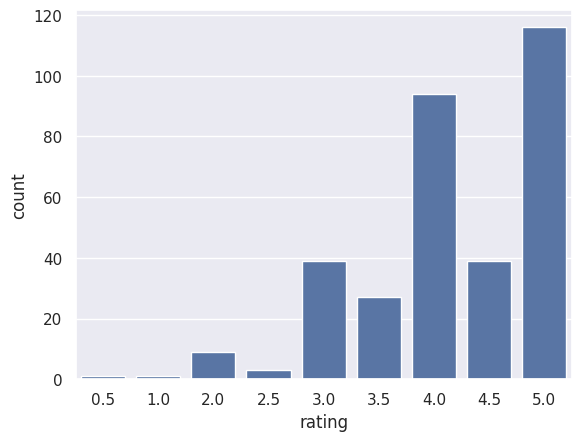

In [178]:
# plot of ratings for forrest gump
df = ratings_df.loc[ratings_df['movieId'] == 356, ['rating']]
df.head()
sns.countplot(x='rating', data=df)

In [179]:
ratings_df['userId'].value_counts(ascending=False).head(5)


,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346


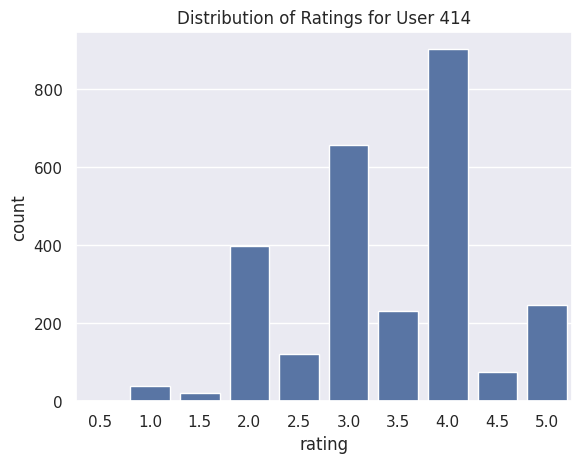

In [180]:
# user 414 has most ratings
df = ratings_df.loc[ratings_df['userId'] == 414, ['rating']]
df.head()
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings for User 414')
plt.show()

In [181]:
movie_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')
movie_ratings_df


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [182]:
mean_ratings = movie_ratings_df.groupby('title')[['rating']].mean()

lowest_rated = mean_ratings['rating'].idxmin()
highest_rated = mean_ratings['rating'].idxmax()

print(f"lowest rated movie: {lowest_rated}")
print(f"highest rated movie: {highest_rated}")

lowest rated movie: 3 Ninjas Knuckle Up (1995)
highest rated movie: 'Salem's Lot (2004)


In [183]:
# converting genres into list
def convert(data: str):
  return data.split('|')

movies_df['genres'] = movies_df['genres'].apply(convert)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [184]:
from collections import Counter

genres = Counter()
for i in movies_df['genres']:
  genres.update(i)
print(f"Total number of genres: {len(genres)}")
genres

Total number of genres: 20


Counter({'Adventure': 1263,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3756,
         'Fantasy': 779,
         'Romance': 1596,
         'Drama': 4361,
         'Action': 1828,
         'Crime': 1199,
         'Thriller': 1894,
         'Horror': 978,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 382,
         'Musical': 334,
         'Documentary': 440,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [185]:
genres_df = pd.DataFrame(columns=['genre', 'count'])
genres_df['genre'] = genres.keys()
genres_df['count'] = genres.values()
genres_df.head()

,genre,count
0,Adventure,1263
1,Animation,611
2,Children,664
3,Comedy,3756
4,Fantasy,779


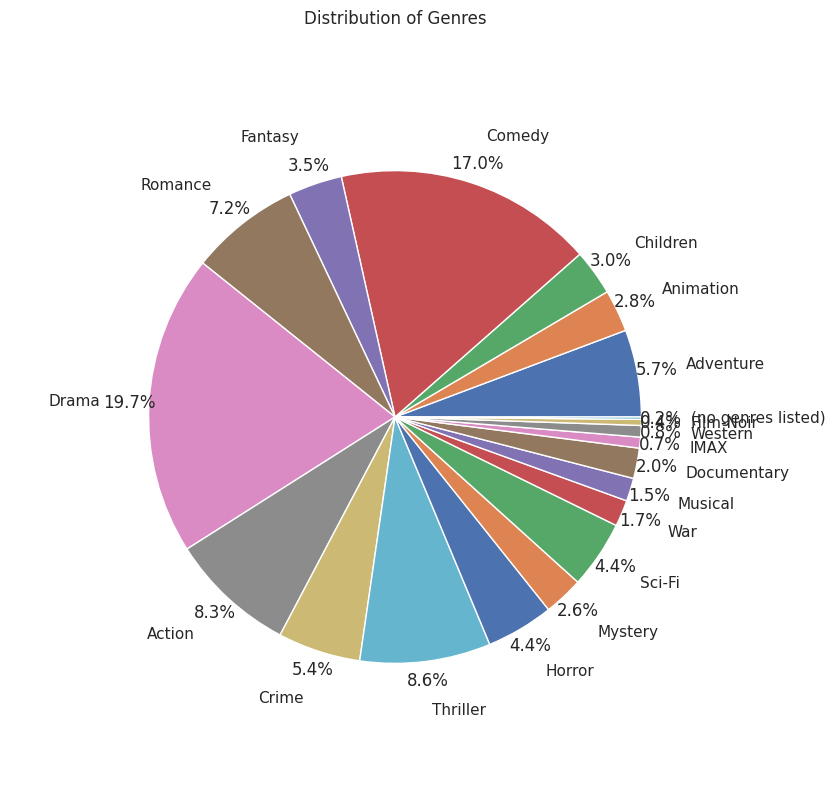

In [186]:
# piechart
plt.figure(figsize=(10, 10))
plt.pie(genres_df['count'], labels=genres_df['genre'], autopct='%1.1f%%', pctdistance=1.08, labeldistance=1.2, radius=0.8)
plt.title('Distribution of Genres')
plt.show()

In [187]:
mean_ratings = ratings_df.groupby('movieId')[['rating']].mean()
mean_ratings.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [188]:
highest_rated = mean_ratings['rating'].idxmax()
lowest_rated = mean_ratings['rating'].idxmin()

In [189]:
movie_ratings_df.loc[movie_ratings_df['movieId'] == highest_rated]

,movieId,title,genres,userId,rating,timestamp
2611,53,Lamerica (1994),Adventure|Drama,85,5.0,889468268
2612,53,Lamerica (1994),Adventure|Drama,603,5.0,963180003


In [190]:
# it is highest rated movie but only rated by two users, this is misleading.
# to get a better average we will calculate bayesian mean for the ratings

movie_stats = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [191]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

# C is average number of ratings for a movie
# m is average rating for a movie

print(f"C: {C: .2f}")
print(f"m: {m: .2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)


C:  10.37
m:  3.26


In [192]:
# testing the bayesian avg for rating [5,5]
bayesian_avg(pd.Series([5,5]))

3.543

In [193]:
bayesian_avg_ratings = ratings_df.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
movie_stats.head()

,movieId,count,mean,bayesian_avg
0,1,215,3.920930,3.891
1,2,110,3.431818,3.417
2,3,52,3.259615,3.260
3,4,7,2.357143,2.898
4,5,49,3.071429,3.105


In [194]:
movie_stats = movie_stats.merge(movies_df[['movieId', 'title']])
movie_stats.head()

,movieId,count,mean,bayesian_avg,title
0,1,215,3.920930,3.891,Toy Story (1995)
1,2,110,3.431818,3.417,Jumanji (1995)
2,3,52,3.259615,3.260,Grumpier Old Men (1995)
3,4,7,2.357143,2.898,Waiting to Exhale (1995)
4,5,49,3.071429,3.105,Father of the Bride Part II (1995)


# collaborative filtering

In [195]:
# data pre-processing
# using colaborative filtering to generate recommendations for users

from scipy.sparse import csr_matrix

def create_X(df):

    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings_df)

In [196]:
X.shape

(610, 9724)

In [197]:
# Evaluating sparsity
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


In [198]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

610

In [199]:
n_ratings_per_user.max(), n_ratings_per_user.min(), n_ratings_per_user.mean()

# most active user's ratings, least active user's ratings and average user ratings

(2698, 20, 165.30491803278687)

In [200]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

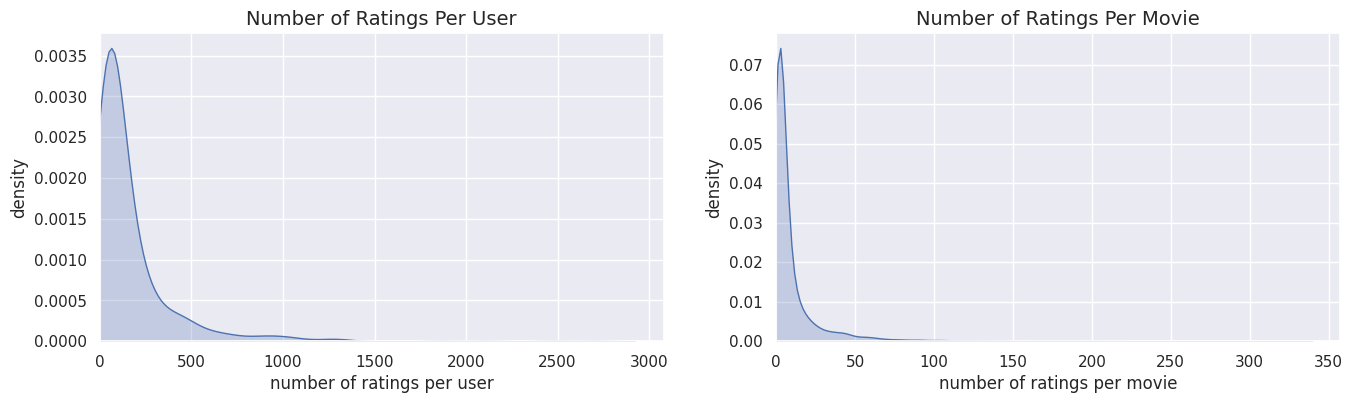

In [201]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

#  Item Recommendations with k-Nearest Neighbors

In [202]:
#  Item-item Recommendations with k-Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):

    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)

    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)

    return neighbour_ids



In [203]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

In [204]:
movie_titles = dict(zip(movies_df['movieId'], movies_df['title']))

movie_id = 4

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Similar movies to {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Similar movies to Waiting to Exhale (1995):
Before and After (1996)
Walking Dead, The (1995)
Nothing Personal (1995)
Bliss (1997)
Gordy (1995)
Spirits of the Dead (1968)
Sum of Us, The (1994)
I Like It Like That (1994)
Poetic Justice (1993)


#Handling the cold-start problem
Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the cold start problem. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.


In [205]:
genres = set(g for G in movies_df['genres'] for g in G)

genres = list(genres)
genres

['Adventure',
 'Comedy',
 'Horror',
 'Children',
 'Film-Noir',
 'Drama',
 'IMAX',
 'Sci-Fi',
 'War',
 'Mystery',
 'Romance',
 '(no genres listed)',
 'Fantasy',
 'Animation',
 'Thriller',
 'Crime',
 'Western',
 'Musical',
 'Documentary',
 'Action']

In [206]:
for g in genres:
    movies_df[g] = movies_df.genres.transform(lambda x: int(g in x))

movie_genres = movies_df.drop(columns=['movieId', 'title','genres'])
movie_genres.head()

,Adventure,Comedy,Horror,Children,Film-Noir,Drama,IMAX,Sci-Fi,War,Mystery,Romance,(no genres listed),Fantasy,Animation,Thriller,Crime,Western,Musical,Documentary,Action
0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [207]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (9742, 9742)


In [208]:
!pip install fuzzywuzzy
# creating a function to find movies easily
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies_df['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

In [209]:
title = movie_finder('toy story')
title

'Toy Story (1995)'

In [210]:
# creating a dictionary of movie titles and indexes
movie_idx = dict(zip(movies_df['title'], list(movies_df.index)))
idx = movie_idx[title]
print(f"Movie index for {title}: {idx}")

Movie index for Toy Story (1995): 0


In [211]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_movies = [i[0] for i in sim_scores]

In [212]:
print(f"movies similar to {title}:")
movies_df['title'].iloc[similar_movies]

movies similar to Toy Story (1995):


,title
1706,Antz (1998)
2355,Toy Story 2 (1999)
2809,"Adventures of Rocky and Bullwinkle, The (2000)"
3000,"Emperor's New Groove, The (2000)"
3568,"Monsters, Inc. (2001)"
6194,"Wild, The (2006)"
6486,Shrek the Third (2007)
6948,"Tale of Despereaux, The (2008)"
7760,Asterix and the Vikings (Astérix et les Vikings) (2006)
8219,Turbo (2013)


In [213]:
def get_content_based_recommendations(title, n=10):
    title = movie_finder(title)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"movies similar to {title}:")
    print(movies_df['title'].iloc[similar_movies])

In [214]:
get_content_based_recommendations('Heat', 5)

movies similar to Heat (1995):
22                      Assassins (1995)
138    Die Hard: With a Vengeance (1995)
156                      Net, The (1995)
249          Natural Born Killers (1994)
417                Judgment Night (1993)
Name: title, dtype: object


# Matrix Factorization

In [215]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape


(9724, 20)

In [216]:
movie_id = 3
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Similar movies to {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Similar movies to Grumpier Old Men (1995):
Tombstone (1993)
Tommy Boy (1995)
Jack (1996)
Coneheads (1993)
City Slickers II: The Legend of Curly's Gold (1994)
Airheads (1994)
Beverly Hills Cop III (1994)
Bio-Dome (1996)
Down Periscope (1996)


In [217]:
#@title #Find similar movies
movie_id = 12 #@param {type:"integer"}
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Similar movies to {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Similar movies to Dracula: Dead and Loving It (1995):
Gremlins 2: The New Batch (1990)
Living Daylights, The (1987)
Beyond the Mat (1999)
Ready to Rumble (2000)
Rambo: First Blood Part II (1985)
Paulie (1998)
Mortal Kombat: Annihilation (1997)
Jingle All the Way (1996)
Tremors (1990)
